<a href="https://colab.research.google.com/github/aritapia19/coder-DataScience77695/blob/main/ProyectoDS_I_TapiaAriel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Data Science – Primera Entrega
### EDA sobre Dataset: Plan Canje – Retiro de Equipos

---

## Abstract
En este proyecto trabajé con el dataset **“Plan Canje – Retiro de Equipos”**, que contiene información sobre las órdenes de retiro de equipos gestionadas tanto en tienda como en domicilio, donde se mide el cumplimiento del SLA (Service Level Agreement) de punta a punta.

El objetivo principal es aplicar técnicas de visualización y análisis exploratorio de datos (EDA) para identificar patrones relevantes, relaciones entre variables y posibles anomalías o factores que influyen en el cumplimiento del SLA.

El análisis incluye una limpieza de datos, detección de valores perdidos, y selección de variables relevantes. Luego se desarrollan visualizaciones que permiten explorar tendencias, distribuciones y correlaciones. A partir de estos resultados se busca brindar una interpretación que ayude a comprender mejor el fenómeno analizado y sentar las bases para análisis posteriores como modelado predictivo o segmentación.

---

## Preguntas de interés / Hipótesis

1.   ¿Existe relación entre el tipo de retiro (tienda o domicilio) y el cumplimiento del **SLA E2E**?
2.   ¿Qué factores influyen más en los tiempos de entrega o retiro?
3.   ¿Se detectan grupos diferenciados de órdenes en función de variables como provincia, tipo de equipo o estado de visita?
4.   ¿Qué variable presenta mayor variabilidad? ¿Existen outliers en los tiempos de proceso?
5.   ¿Cómo se distribuye el **SLA E2E** según distintas categorías (tipo de retiro, familia de equipos, región)?
---








In [25]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [4]:
# Configuración visual
plt.style.use("default")
pd.set_option("display.max_columns", 50)
sns.set_palette("Set2")

In [5]:
# Cargar dataset
csv_path = "/content/sample_data/Dataset plan canje.csv"
df = pd.read_csv(csv_path, sep=";", encoding="latin1")

/tmp/ipython-input-2665956717.py:3: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, sep=";", encoding="latin1")


In [6]:
# Vista inicial
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head())

Dimensiones del dataset: (23487, 46)

Primeras filas:


,Key,KeyB3,Handsetquote Id,Model Name,Imei,Vendor Name,DNI,Address,Sales Man Email,Sales Man Phone,Localidad,Provincia,CP,Negocio,Familia,Tipo retiro,Master Box,Master Box Date,Fecha despacho,Fecha tentativa,Días despacho,SLA despacho,Fecha insumo,Correo 1,Fecha 1° visita,Motivo 1° visita,Estado visita,Días 1° Visita,SLA 1° Visita,SLA E2E,Arribo Mirlog,Estado Mirlog,Días MB-Mirlog,Días Despacho-Mirlog,Últ. correo,Últ. fecha,Últ. Tracking,Últ. Motivo,Visitas,Estado de retiro,Familia (grupos),Estado de retiro (grupos),KeyMultidivice,Multidivice,Validación Cancelados,Agrupador 1er Visita
0,263051446-Samsung-Celulares,263051446-4624118-Celulares,4624118,Samsung-Galaxy Note20 SM-N980F 256GB,"3,57516E+14",Alfio Daniel Lee,31982044.0,AVENIDA RIVADAVIA 7018 Ciudad Autónoma de Bue...,leealfiodaniel@hotmail.com,"5,4113E+11",C.A.B.A.,BUENOS AIRES,1406,Samsung,Celulares,Domicilio,263051446,2/1/2023,3/1/2023,6/1/2023,1,Ok,NaN,EPSA,4/1/2023,POD-ENTREGADA,Ok,1.0,Ok,2.0,10/1/2023,Finalizado,6.0,5.0,EPSA,4/1/2023,2992163,POD-ENTREGADA,1,Retirado-Entregado,Celulares+Tablets,Retirado-Entregado,263051446-Samsung,No,NaN,Retirado-Entregado
1,263051490-Samsung-Celulares,263051490-4628675-Celulares,4628675,Samsung-Galaxy J6 SM-J600G 32GB,"3,59225E+14",Mariela Laura Aguirre,26732898.0,JOSE GERVASIO ARTIGAS 582 CABA cp 1406,aguirremarielalaura@gmail.com,"5,41163E+11",C.A.B.A.,BUENOS AIRES,1406,Samsung,Celulares,Domicilio,263051490,3/1/2023,4/1/2023,9/1/2023,1,Ok,NaN,EPSA,5/1/2023,POD-ENTREGADA,Ok,1.0,Ok,2.0,10/1/2023,Finalizado,5.0,4.0,EPSA,5/1/2023,2994856,POD-ENTREGADA,1,Retirado-Entregado,Celulares+Tablets,Retirado-Entregado,263051490-Samsung,No,NaN,Retirado-Entregado
2,263051521-Samsung-Celulares,263051521-4626841-Celulares,4626841,Apple-iPhone 8 Plus 64GB,"3,56712E+14",Federico Amor,22849402.0,"Rivera Indarte 175 - 6 ""A"" - CABA - CP: 1406.",famorg@gmail.com,"5,41139E+11",C.A.B.A.,BUENOS AIRES,1406,Samsung,Celulares,Domicilio,263051521,3/1/2023,4/1/2023,9/1/2023,1,Ok,NaN,EPSA,5/1/2023,POD-ENTREGADA,Ok,1.0,Ok,2.0,10/1/2023,Finalizado,5.0,4.0,EPSA,5/1/2023,2994849,POD-ENTREGADA,1,Retirado-Entregado,Celulares+Tablets,Retirado-Entregado,263051521-Samsung,No,NaN,Retirado-Entregado
3,263051540-Samsung-Celulares,263051540-4628347-Celulares,4628347,Samsung-Galaxy Note8 SM-N950F DS 64GB,"3,55731E+14",Diana Violeta Lee,32267023.0,"DR F DE ARANGUREN 3333 (local a la calle), Ent...",diduchis@gmail.com,"5,41142E+11",C.A.B.A.,BUENOS AIRES,1406,Samsung,Celulares,Domicilio,263051540,3/1/2023,4/1/2023,9/1/2023,1,Ok,NaN,EPSA,5/1/2023,POD-ENTREGADA,Ok,1.0,Ok,2.0,10/1/2023,Finalizado,5.0,4.0,EPSA,5/1/2023,2994848,POD-ENTREGADA,1,Retirado-Entregado,Celulares+Tablets,Retirado-Entregado,263051540-Samsung,No,NaN,Retirado-Entregado
4,263051556-Samsung-Celulares,263051556-4628375-Celulares,4628375,Samsung-Galaxy S20 FE SM-G780F 128GB,"3,50556E+14",Inti Rojas,30059332.0,Renan 1160. CABA. CP 1406,intirojas83@gmail.com,"5,4115E+11",C.A.B.A.,BUENOS AIRES,1406,Samsung,Celulares,Domicilio,263051556,3/1/2023,4/1/2023,9/1/2023,1,Ok,NaN,EPSA,5/1/2023,POD-ENTREGADA,Ok,1.0,Ok,2.0,10/1/2023,Finalizado,5.0,4.0,EPSA,5/1/2023,2994836,POD-ENTREGADA,1,Retirado-Entregado,Celulares+Tablets,Retirado-Entregado,263051556-Samsung,Si,NaN,Retirado-Entregado


In [7]:
# Información básica
print("\nInformación general:")
print(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe(include="all").T)


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23487 entries, 0 to 23486
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Key                        23487 non-null  object 
 1   KeyB3                      23487 non-null  object 
 2   Handsetquote Id            23487 non-null  int64  
 3   Model Name                 23485 non-null  object 
 4   Imei                       23457 non-null  object 
 5   Vendor Name                23487 non-null  object 
 6   DNI                        23486 non-null  float64
 7   Address                    23485 non-null  object 
 8   Sales Man Email            23252 non-null  object 
 9   Sales Man Phone            23254 non-null  object 
 10  Localidad                  23487 non-null  object 
 11  Provincia                  23487 non-null  object 
 12  CP                         23487 non-null  int64  
 13  Negocio                 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Key,23487,23334,263058015-Samsung-Celulares,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KeyB3,23487,23487,263069169-5015857-Celulares,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Handsetquote Id,23487.0,NaN,NaN,NaN,4759740.092945,365759.225068,4000027.0,4658314.0,4795728.0,5050022.5,5273089.0
Model Name,23485,1371,Samsung Galaxy S20 FE 128 GB,661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Imei,23457,5482,"3,59194E+14",644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vendor Name,23487,20724,Alvaro Wagener,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DNI,23486.0,NaN,NaN,NaN,32334051.61377,37610316.24847,4700.0,24562372.0,31077017.5,36504584.0,3070957616.0
Address,23485,23088,"Calle gil paz 2191 es casa esquina, calle gil ...",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales Man Email,23252,20551,awagener@daseragro.com.ar,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales Man Phone,23254,1816,"5,41E+11",2055,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Key                              0
KeyB3                            0
Handsetquote Id                  0
Model Name                       2
Imei                            30
Vendor Name                      0
DNI                              1
Address                          2
Sales Man Email                235
Sales Man Phone                233
Localidad                        0
Provincia                        0
CP                               0
Negocio                          0
Familia                          0
Tipo retiro                      0
Master Box                       0
Master Box Date                  0
Fecha despacho                   0
Fecha tentativa                  0
Días despacho                    0
SLA despacho                     0
Fecha insumo                 21547
Correo 1                         0
Fecha 1° visita                409
Motivo 1° visita               438
Estado visita                    0
Días 1° Visita             

In [9]:
# Porcentaje de nulos
print("\nPorcentaje de nulos:")
print((df.isnull().mean()*100).round(2))


Porcentaje de nulos:
Key                           0.00
KeyB3                         0.00
Handsetquote Id               0.00
Model Name                    0.01
Imei                          0.13
Vendor Name                   0.00
DNI                           0.00
Address                       0.01
Sales Man Email               1.00
Sales Man Phone               0.99
Localidad                     0.00
Provincia                     0.00
CP                            0.00
Negocio                       0.00
Familia                       0.00
Tipo retiro                   0.00
Master Box                    0.00
Master Box Date               0.00
Fecha despacho                0.00
Fecha tentativa               0.00
Días despacho                 0.00
SLA despacho                  0.00
Fecha insumo                 91.74
Correo 1                      0.00
Fecha 1° visita               1.74
Motivo 1° visita              1.86
Estado visita                 0.00
Días 1° Visita                3.6

In [10]:
# Duplicados
print("\nCantidad de duplicados:", df.duplicated().sum())


Cantidad de duplicados: 0


In [11]:
# Eliminar filas con al menos un valor negativo en cualquier columna numérica
df = df[~(df.select_dtypes(include='number') < 0).any(axis=1)]


In [12]:
# Verificar si hay valores negativos en cada columna
negativos_despacho = df["Días despacho"] < 0
negativos_mb_mirlog = df["Días MB-Mirlog"] < 0

# Mostrar cuántos valores negativos hay en cada columna
print("Valores negativos en 'Días despacho':", negativos_despacho.sum())
print("Valores negativos en 'Días MB-Mirlog':", negativos_mb_mirlog.sum())


Valores negativos en 'Días despacho': 0
Valores negativos en 'Días MB-Mirlog': 0


## Análisis univariado

*   Variables categóricas:

* *  La mayoría de las órdenes finalizan en el estado *“Retirado – Entregado”*.
* *  **El SLA despacho** y el **SLA E2E** muestran que gran parte de las operaciones se cumplen, pero también existen casos de incumplimiento que requieren análisis.
* * En la variable Tipo retiro, se observa predominancia de un canal sobre el otro (tienda vs domicilio).

*   Variables numéricas:

* * Los **días de despacho** presentan una distribución sesgada, con valores concentrados en rangos bajos pero con presencia de outliers en tiempos muy altos.
* * La variable **Visitas** se concentra en 1, aunque existen casos con más intentos, lo cual implica mayores costos y menor eficiencia operativa.


Variables categóricas: ['Key', 'KeyB3', 'Model Name', 'Imei', 'Vendor Name', 'Address', 'Sales Man Email', 'Sales Man Phone', 'Localidad', 'Provincia', 'Negocio', 'Familia', 'Tipo retiro', 'Master Box Date', 'Fecha despacho', 'Fecha tentativa', 'SLA despacho', 'Fecha insumo', 'Correo 1', 'Fecha 1° visita', 'Motivo 1° visita', 'Estado visita', 'SLA 1° Visita', 'Arribo Mirlog', 'Estado Mirlog', 'Últ. correo', 'Últ. fecha', 'Últ. Tracking', 'Últ. Motivo', 'Estado de retiro', 'Familia (grupos)', 'Estado de retiro (grupos)', 'KeyMultidivice', 'Multidivice', 'Validación Cancelados', 'Agrupador 1er Visita']


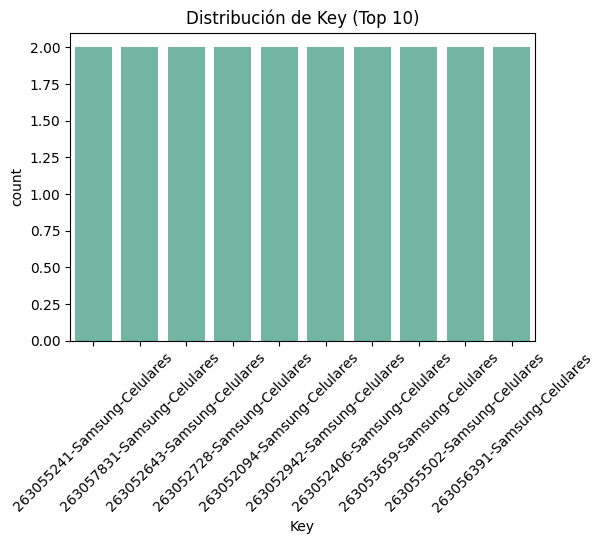

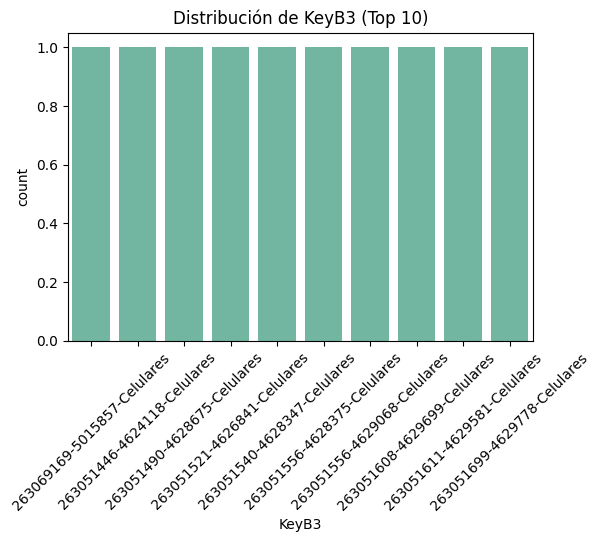

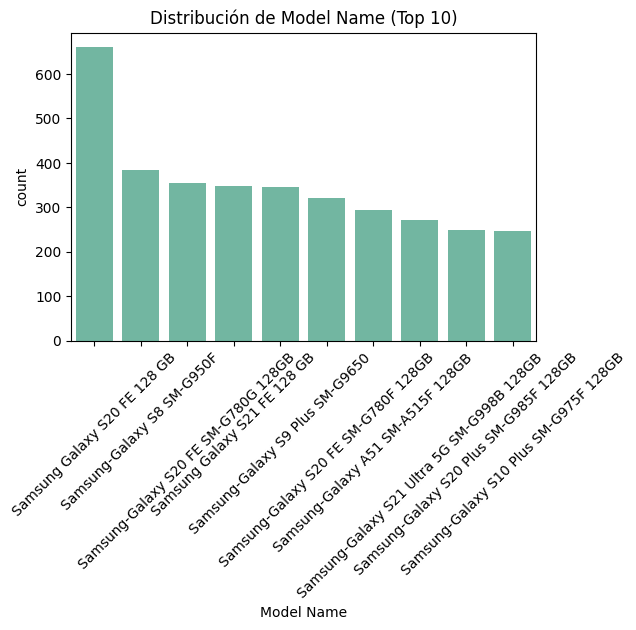

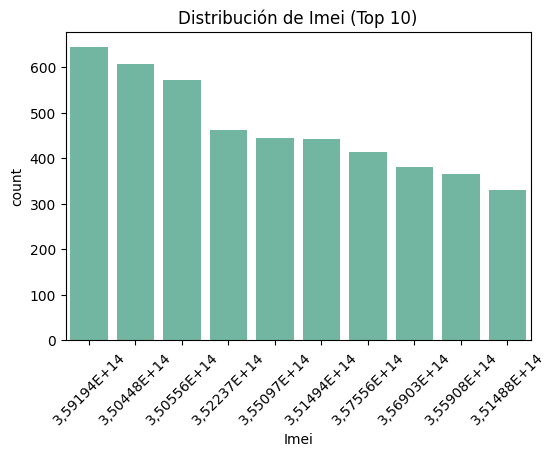

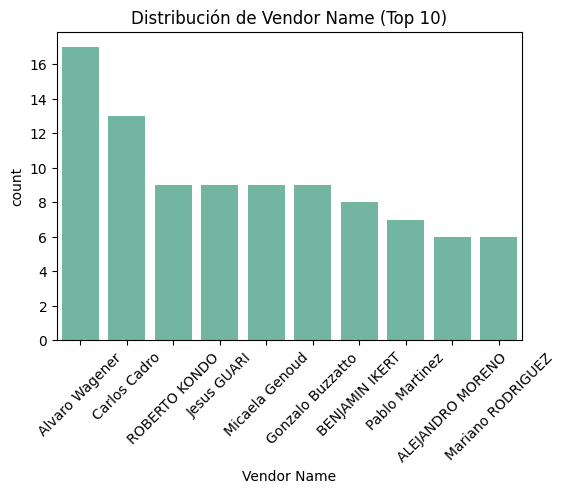

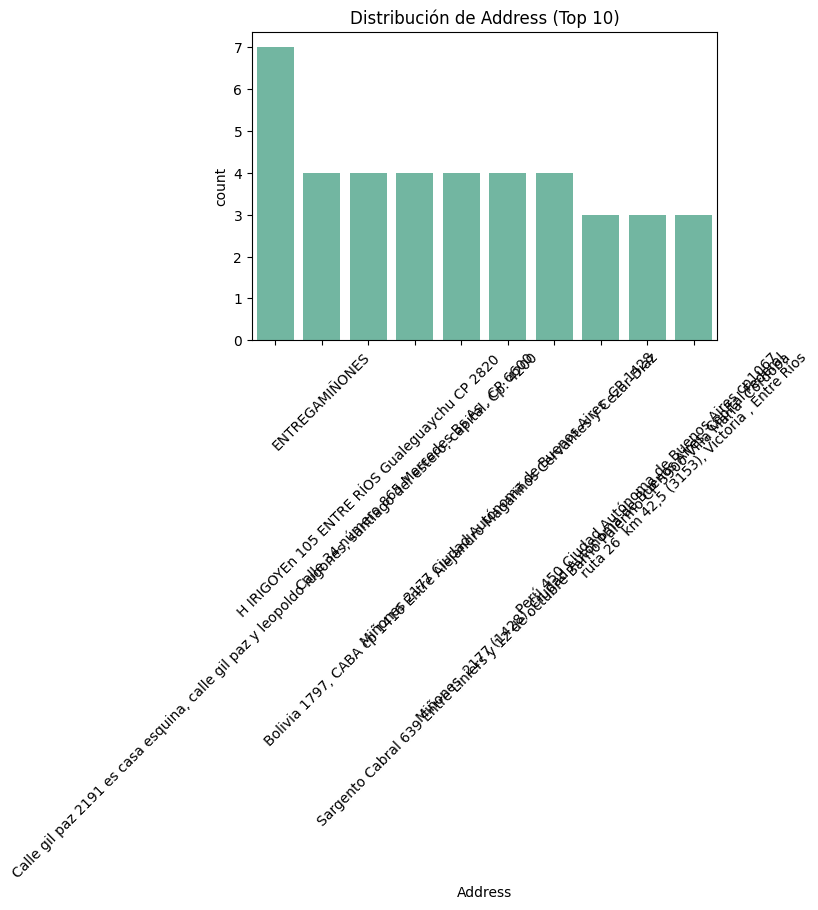

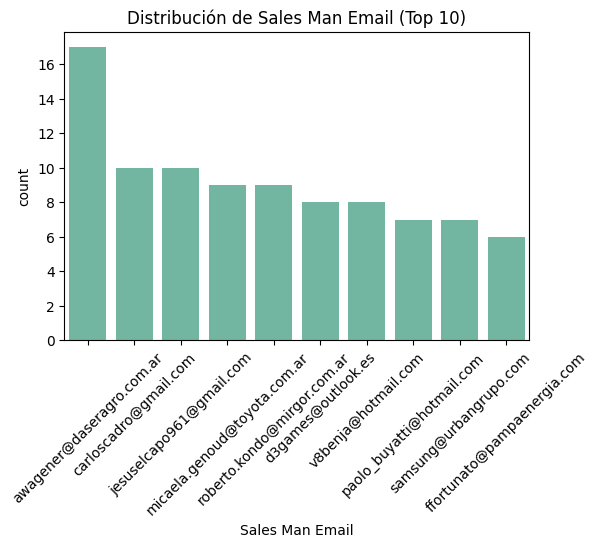

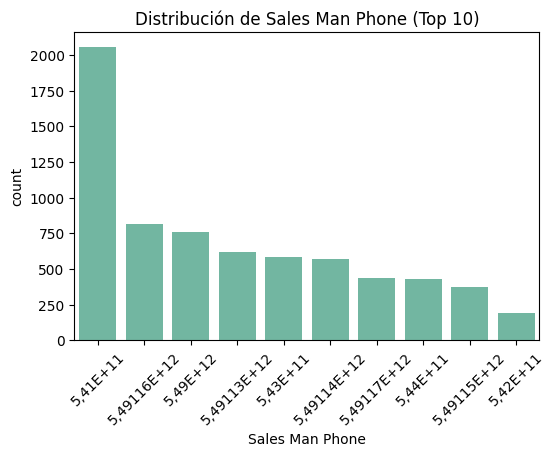

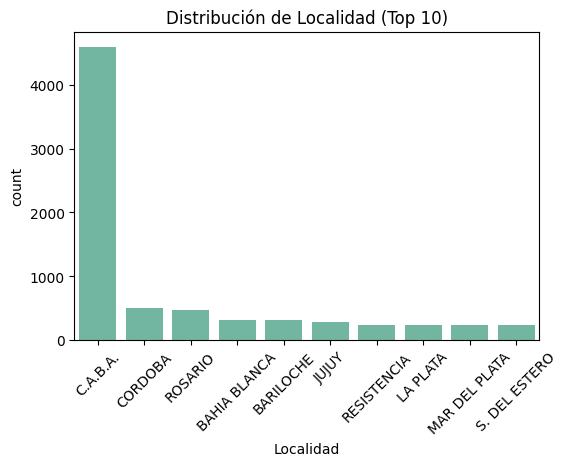

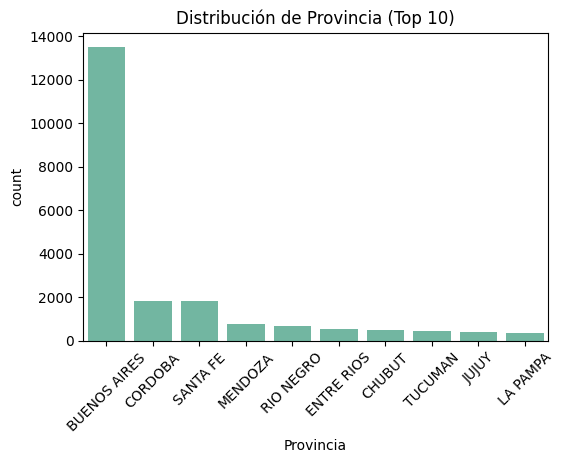

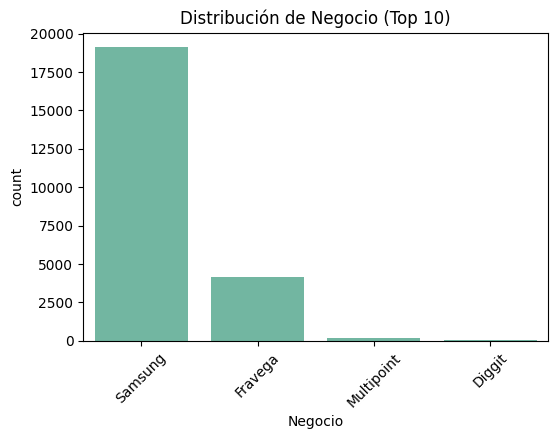

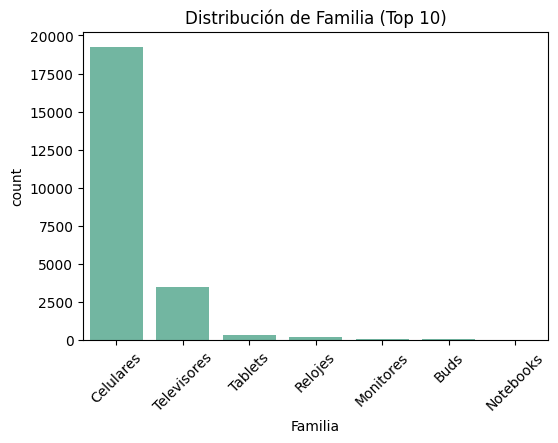

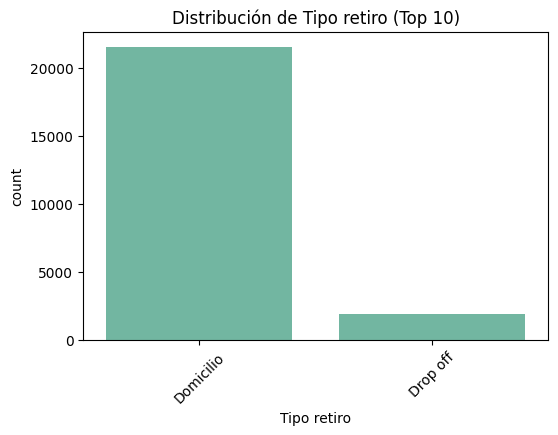

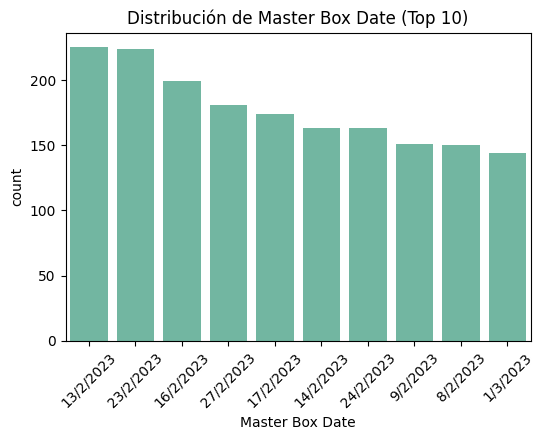

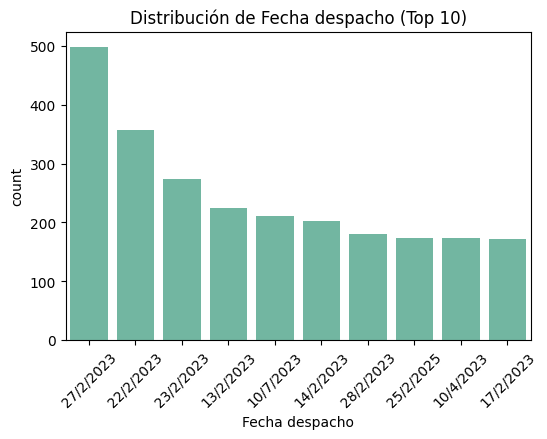

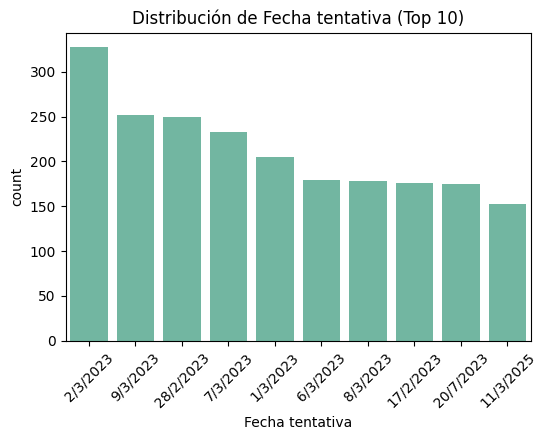

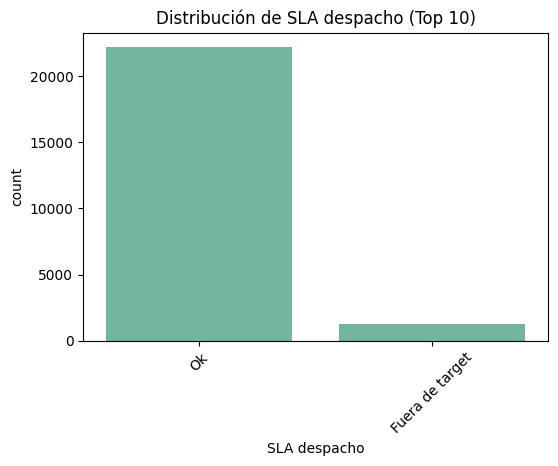

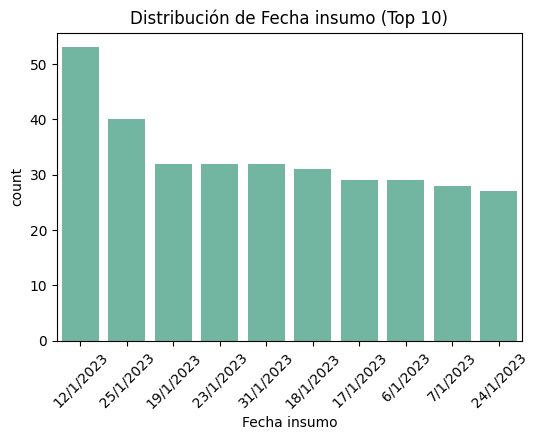

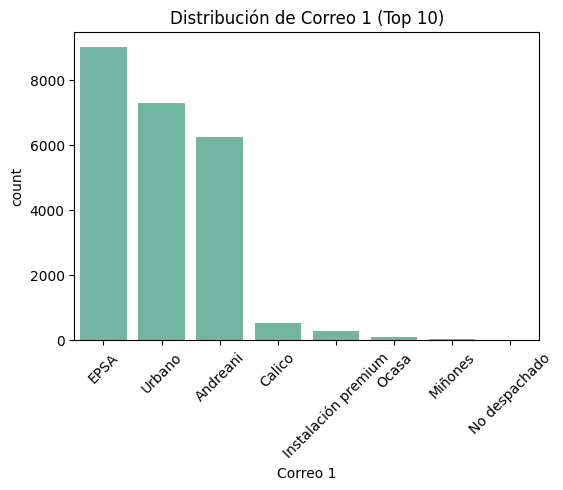

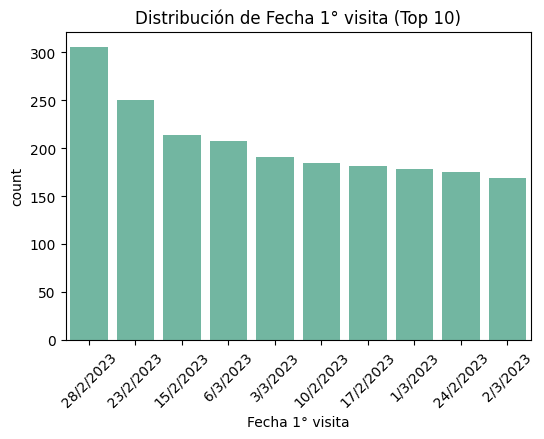

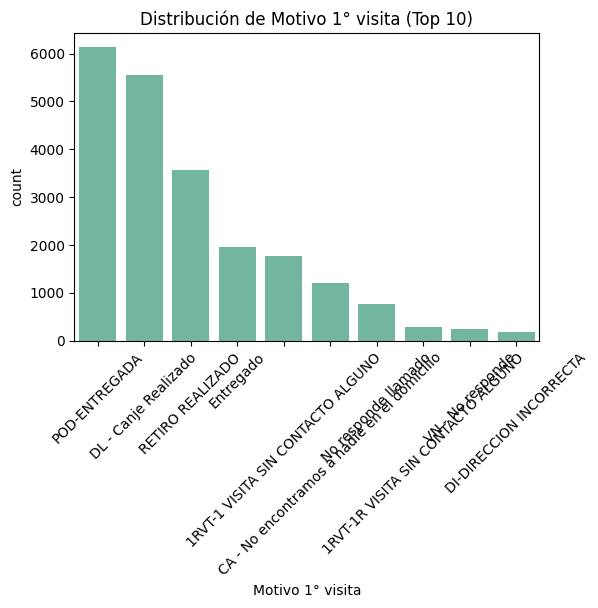

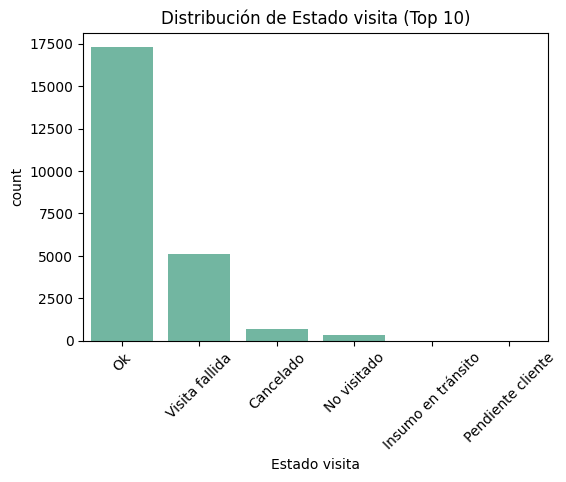

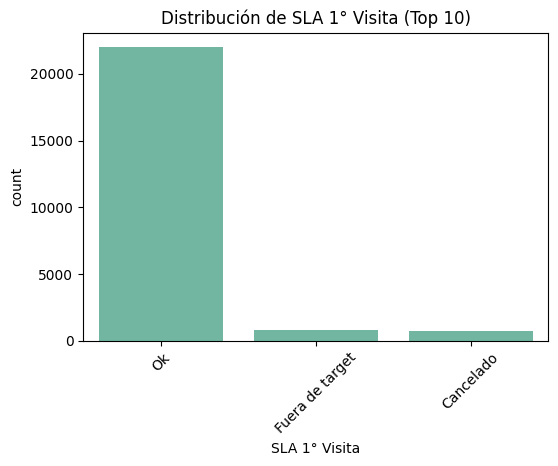

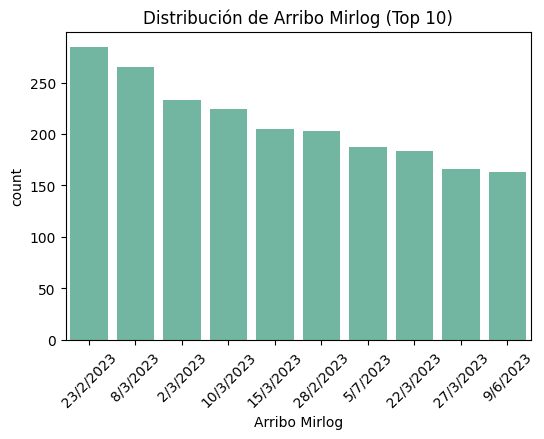

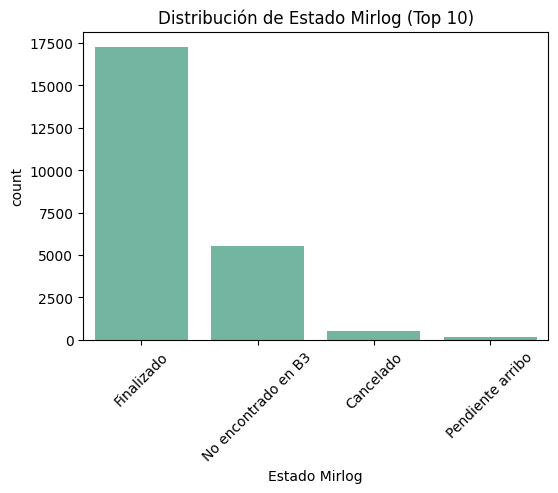

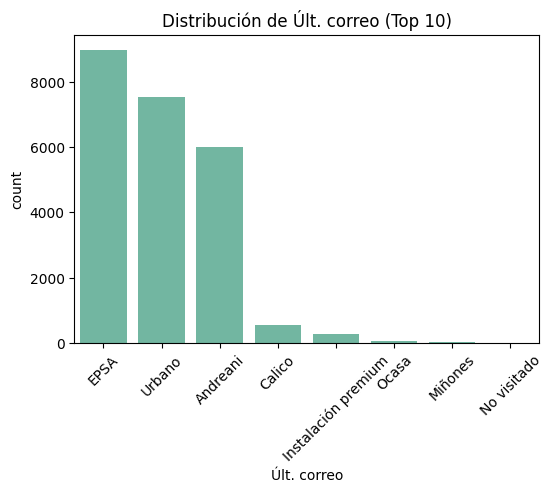

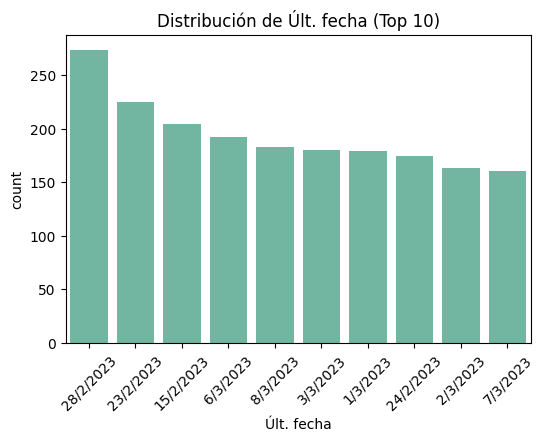

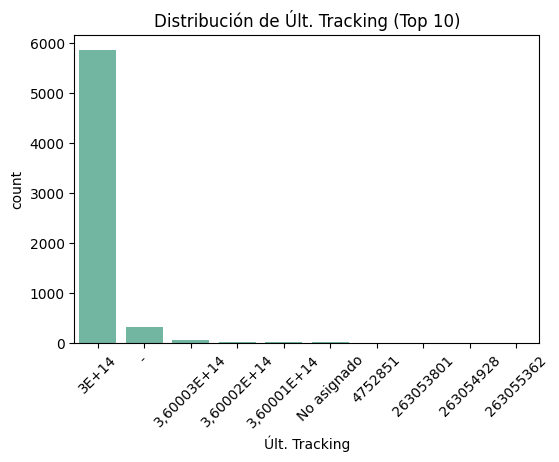

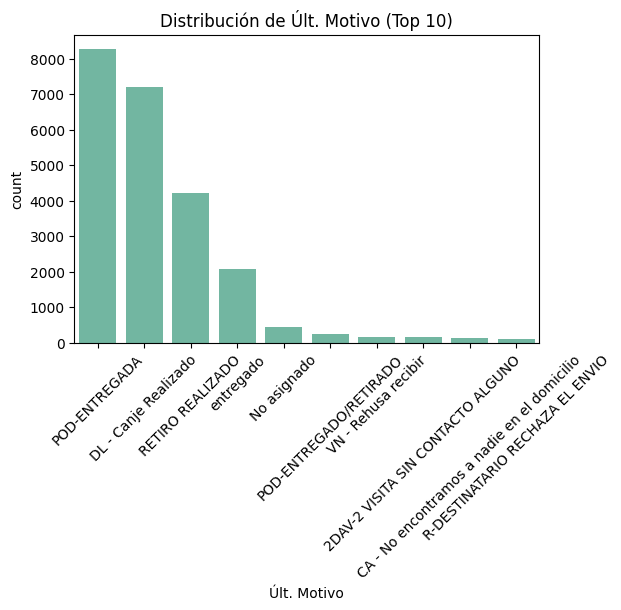

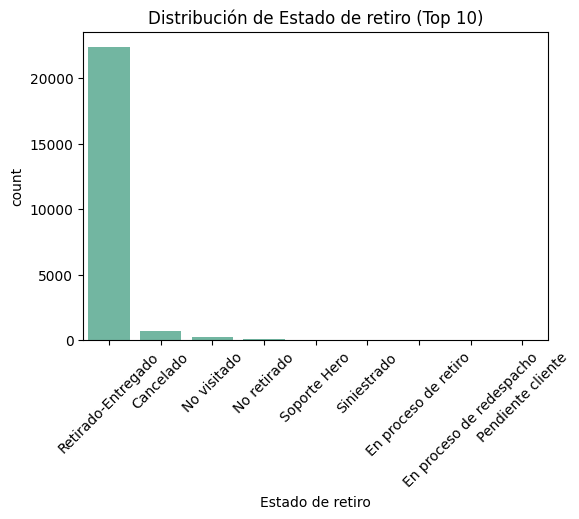

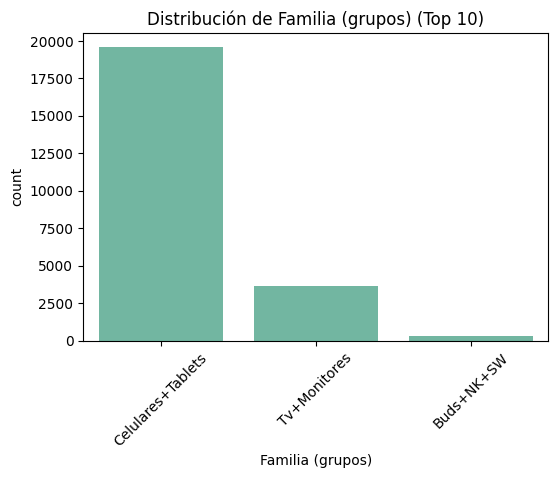

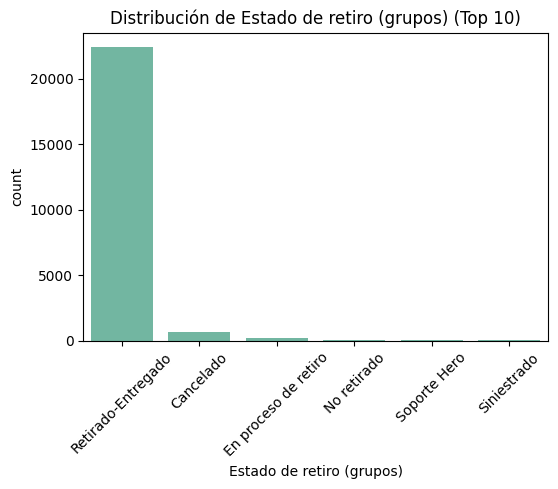

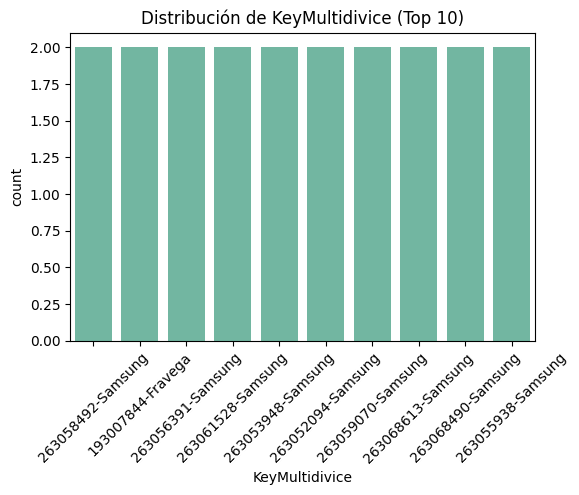

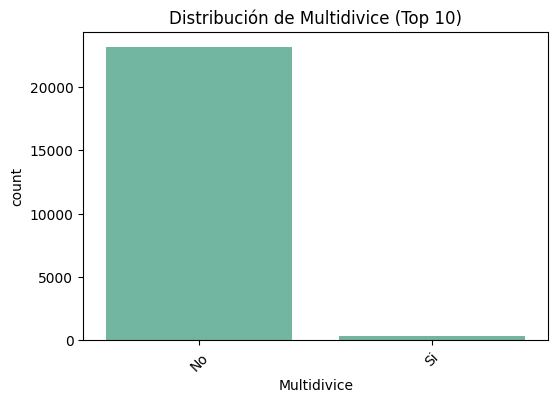

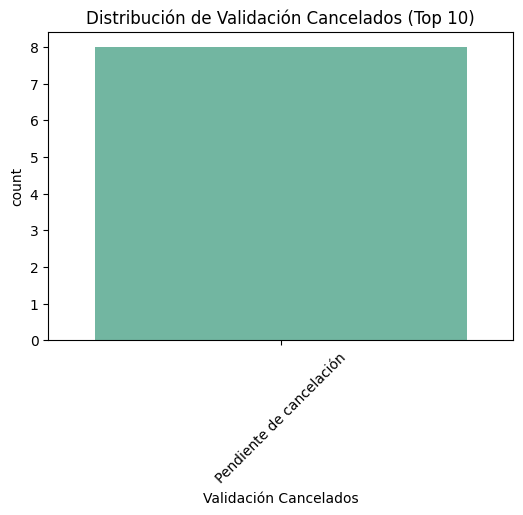

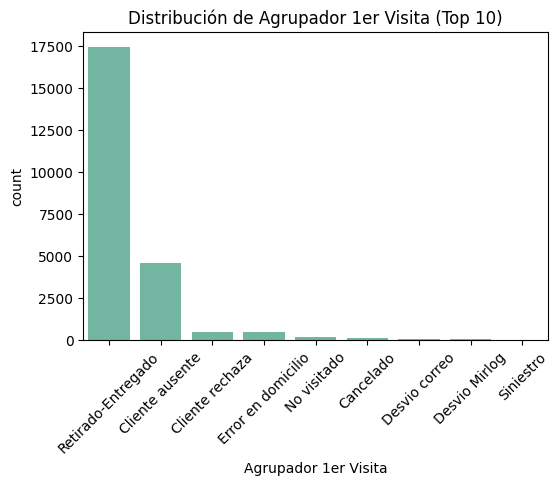

In [13]:
# Variables categóricas
cat_vars = df.select_dtypes(include=["object"]).columns
print("\nVariables categóricas:", list(cat_vars))

for col in cat_vars:
    plt.figure(figsize=(6,4))

    # Tomar las 10 categorías más frecuentes
    top_categories = df[col].value_counts().nlargest(10).index
    sns.countplot(data=df[df[col].isin(top_categories)], x=col, order=top_categories)

    plt.title(f"Distribución de {col} (Top 10)")
    plt.xticks(rotation=45)
    plt.show()


Variables numéricas: ['Handsetquote Id', 'DNI', 'CP', 'Master Box', 'Días despacho', 'Días 1° Visita', 'SLA E2E', 'Días MB-Mirlog', 'Días Despacho-Mirlog', 'Visitas']


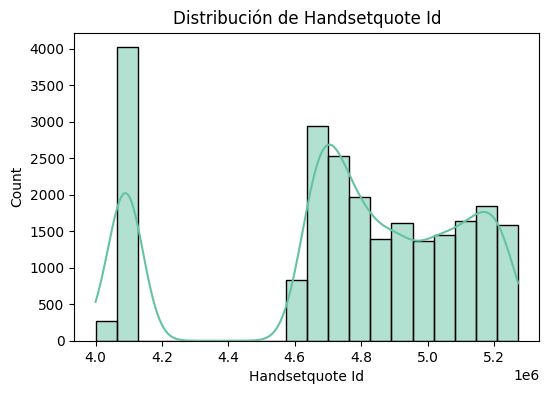

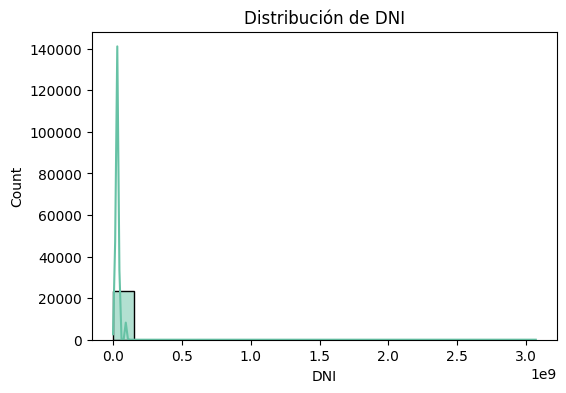

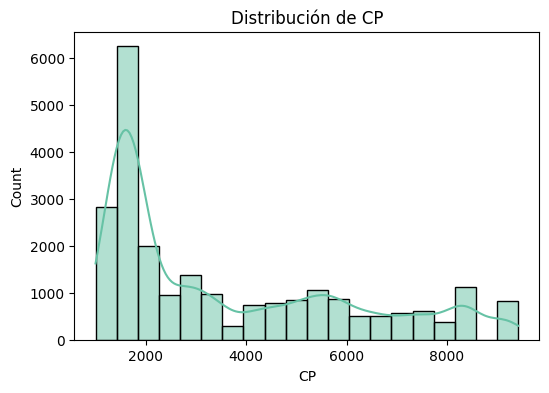

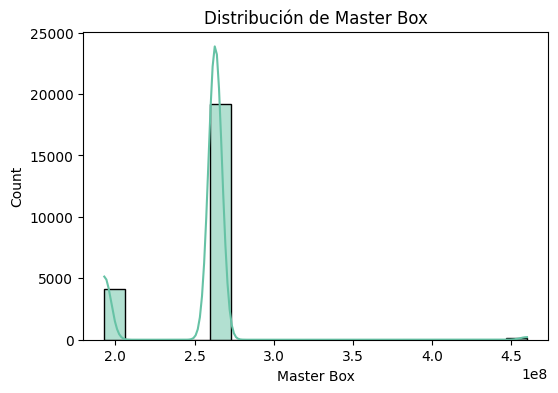

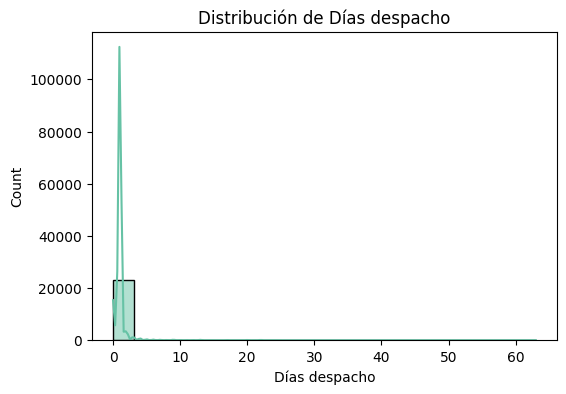

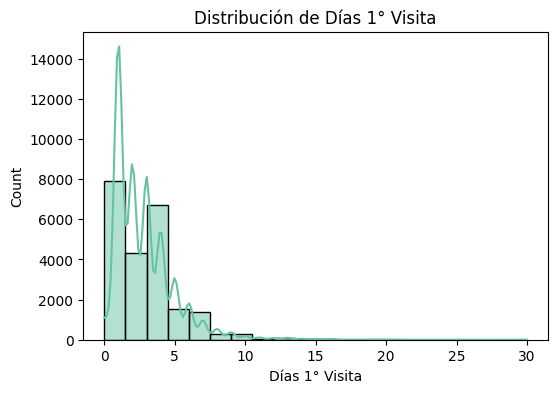

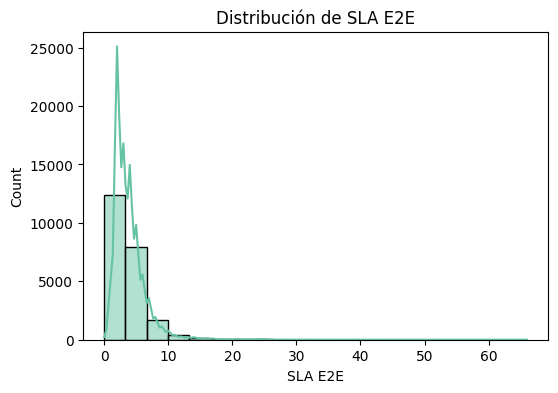

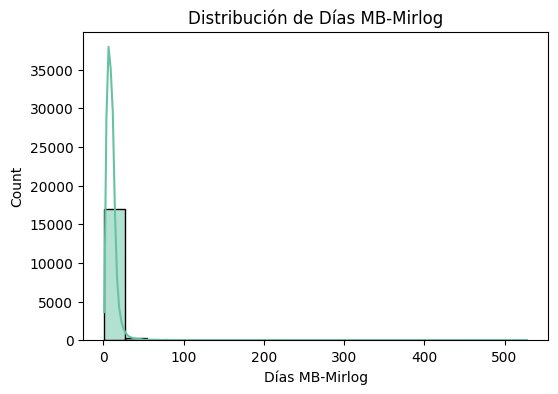

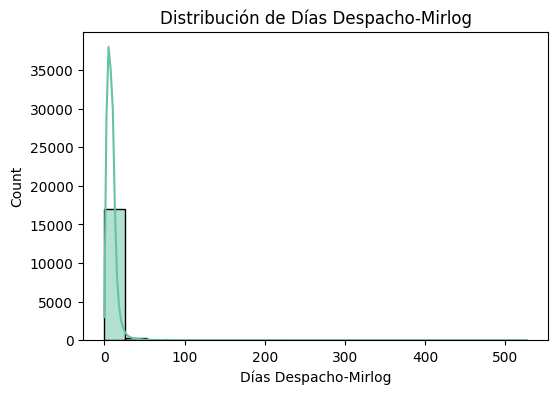

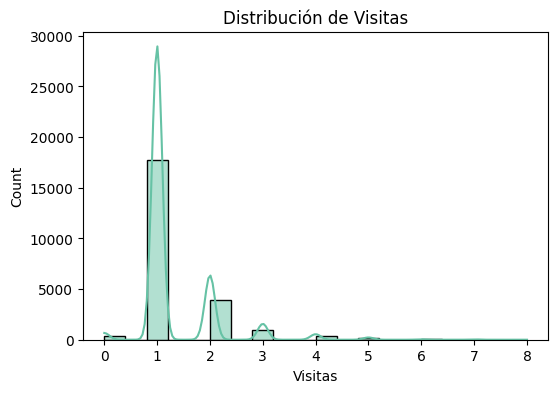

In [14]:
# Variables numéricas
num_vars = df.select_dtypes(include=["int64", "float64"]).columns
print("\nVariables numéricas:", list(num_vars))

for col in num_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribución de {col}")
    plt.show()


## Análisis bivariado

* Tipo de retiro vs SLA E2E:
Se observa que el canal de retiro puede influir en el nivel de cumplimiento del SLA. En algunos casos, el retiro en domicilio muestra mayor dispersión en los tiempos.

* Boxplots (tiempos vs tipo de retiro):
Indican que en ciertos tipos de retiro los tiempos de despacho son más variables, y en algunos casos se extienden notablemente respecto al promedio.

* Correlaciones numéricas:
Existe relación entre Días despacho y Días 1° Visita, lo cual sugiere que demoras en una etapa pueden arrastrar retrasos en las siguientes.

---

In [15]:
# Ajustar según tus columnas relevantes (ej: 'tipo_retiro' vs 'tiempo_total')
if "tipo_retiro" in df.columns and "tiempo_total" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="tipo_retiro", y="tiempo_total")
    plt.title("Tiempo total según tipo de retiro")
    plt.show()



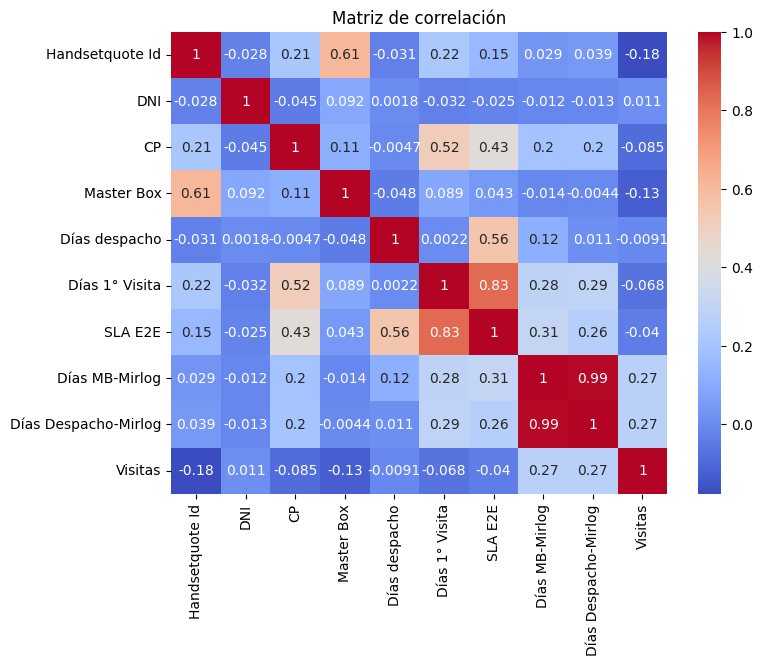

In [16]:
# Correlaciones
plt.figure(figsize=(8,6))
sns.heatmap(df[num_vars].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

##Análisis multivariado

* **Scatterplot:**
El cruce entre Días de despacho y Días de 1° visita con color por SLA E2E muestra claramente los casos de incumplimiento, que tienden a acumularse en valores altos de ambos tiempos.

* **Pairplot:**
Confirma correlaciones parciales entre las distintas variables de tiempos, además de mostrar la existencia de grupos de órdenes con comportamientos atípicos.

---

In [17]:
if {"tiempo_total", "tiempo_estimado", "estado_sla"}.issubset(df.columns):
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=df,
        x="tiempo_estimado",
        y="tiempo_total",
        hue="estado_sla",
        size="tiempo_total",
        alpha=0.7
    )
    plt.title("Tiempo estimado vs tiempo real según SLA")
    plt.show()

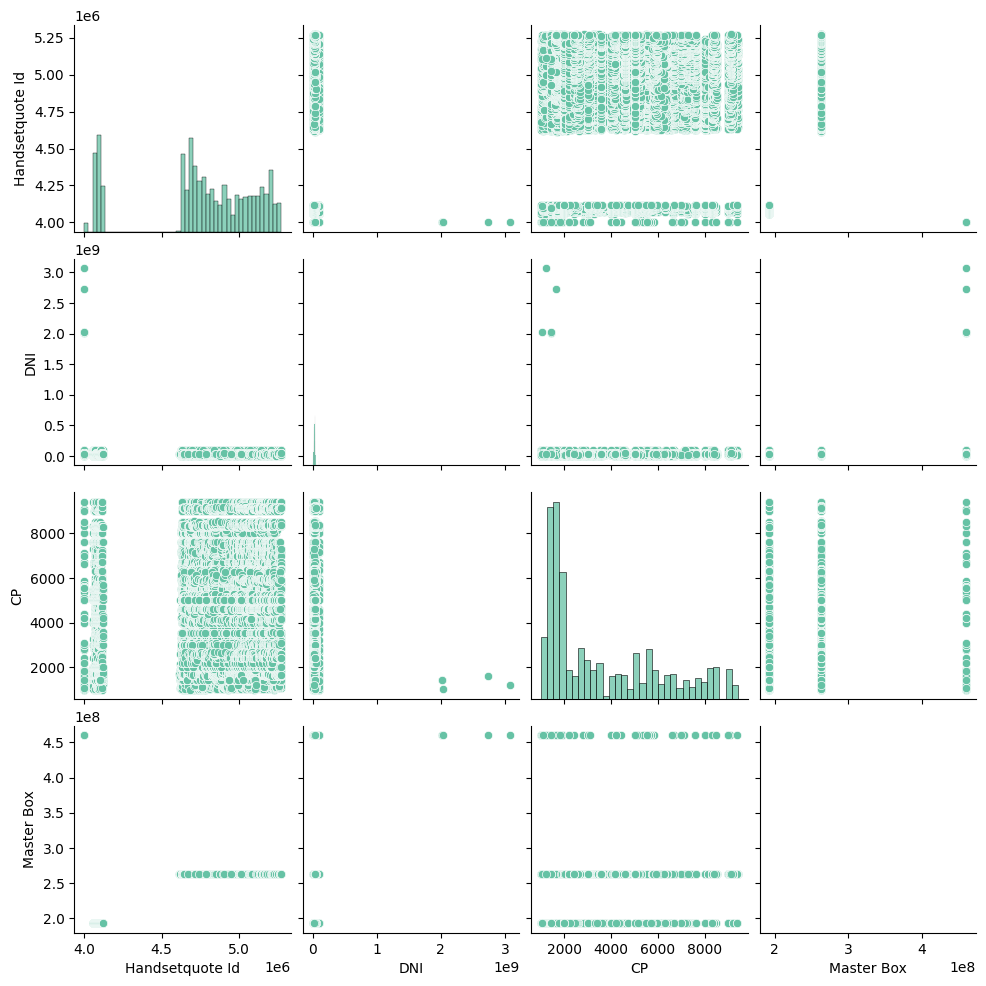

In [18]:
# Pairplot (solo primeras numéricas para no saturar)
sns.pairplot(df[num_vars[:4]])
plt.show()

## Análisis de las hipótesis




---


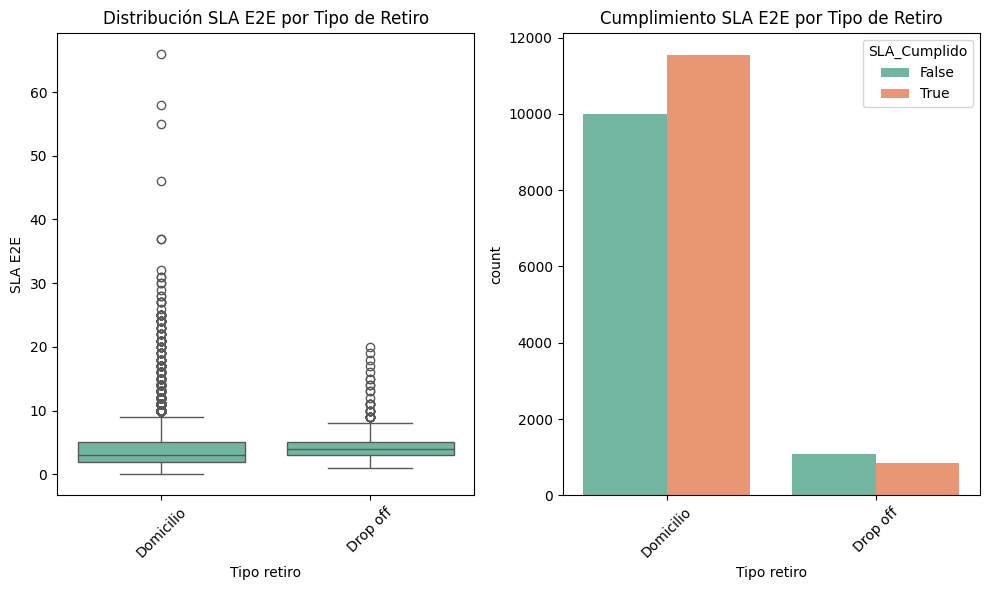

Tabla de contingencia - Tipo retiro vs SLA E2E cumplido:


SLA_Cumplido,False,True,All
Tipo retiro,,,
Domicilio,9988,11548,21536
Drop off,1083,848,1931
All,11071,12396,23467



Porcentajes por tipo de retiro:


SLA_Cumplido,False,True
Tipo retiro,,
Domicilio,46.38,53.62
Drop off,56.08,43.92


In [19]:
# Hipótesis 1: ¿Existe relación entre el tipo de retiro y el cumplimiento del SLA E2E?
plt.figure(figsize=(10, 6))

# Boxplot para comparar distribución del SLA E2E por tipo de retiro
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Tipo retiro', y='SLA E2E')
plt.title('Distribución SLA E2E por Tipo de Retiro')
plt.xticks(rotation=45)

# Análisis de cumplimiento (considerando SLA E2E <= 3 días como cumplido)
plt.subplot(1, 2, 2)
df['SLA_Cumplido'] = df['SLA E2E'] <= 3
sns.countplot(data=df, x='Tipo retiro', hue='SLA_Cumplido')
plt.title('Cumplimiento SLA E2E por Tipo de Retiro')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Tabla cruzada para análisis cuantitativo
print("Tabla de contingencia - Tipo retiro vs SLA E2E cumplido:")
contingencia = pd.crosstab(df['Tipo retiro'], df['SLA_Cumplido'], margins=True)
display(contingencia)

print("\nPorcentajes por tipo de retiro:")
porcentajes = pd.crosstab(df['Tipo retiro'], df['SLA_Cumplido'], normalize='index') * 100
display(porcentajes.round(2))

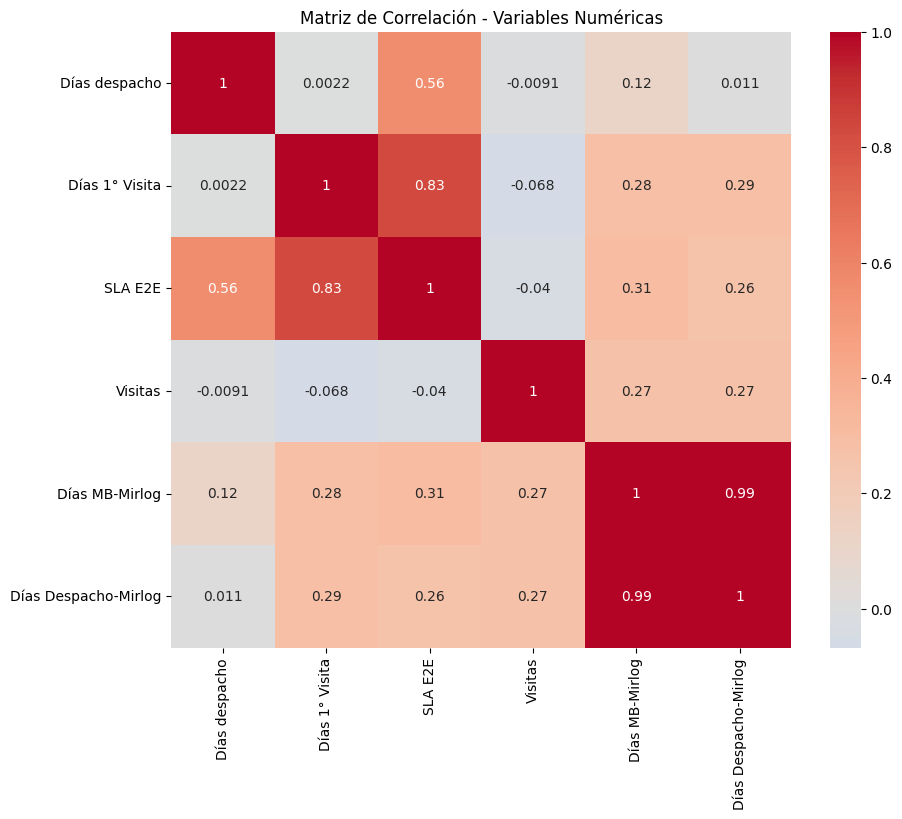

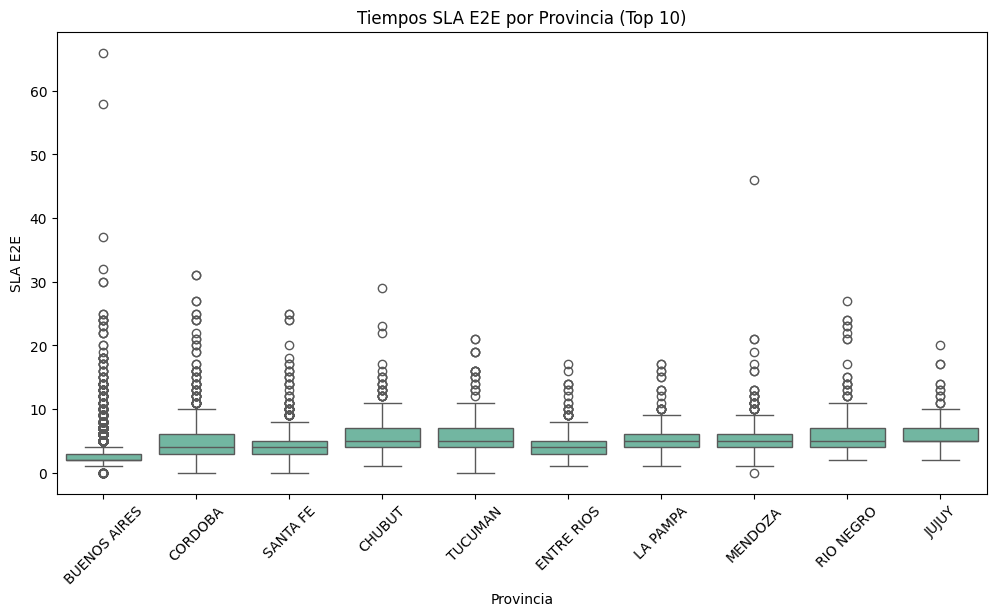

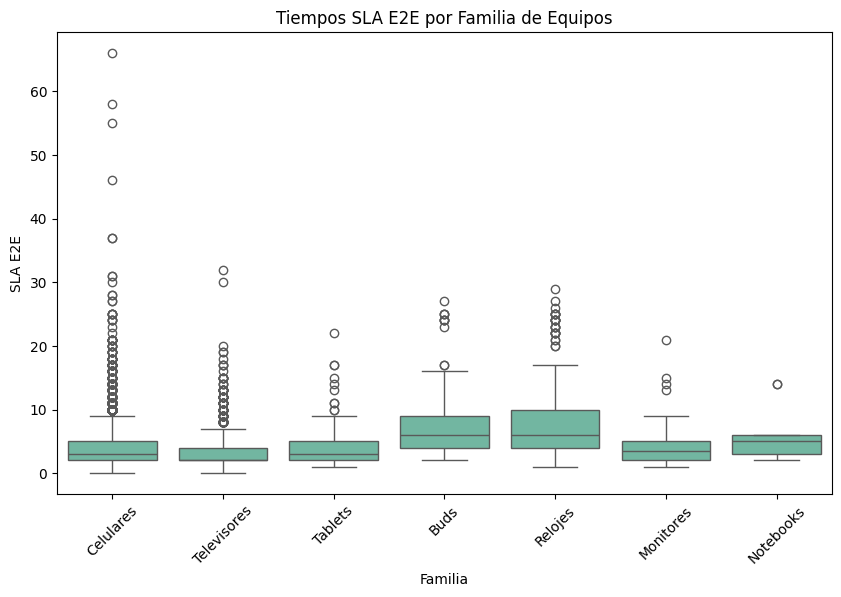

In [20]:
# Hipótesis 2: Factores que influyen en tiempos de entrega
# Matriz de correlación entre variables numéricas
variables_numericas = ['Días despacho', 'Días 1° Visita', 'SLA E2E', 'Visitas', 'Días MB-Mirlog', 'Días Despacho-Mirlog']
corr_matrix = df[variables_numericas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()

# Análisis de tiempos por provincia
plt.figure(figsize=(12, 6))
top_provincias = df['Provincia'].value_counts().head(10).index
df_top_prov = df[df['Provincia'].isin(top_provincias)]

sns.boxplot(data=df_top_prov, x='Provincia', y='SLA E2E')
plt.title('Tiempos SLA E2E por Provincia (Top 10)')
plt.xticks(rotation=45)
plt.show()

# Análisis por familia de equipos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Familia', y='SLA E2E')
plt.title('Tiempos SLA E2E por Familia de Equipos')
plt.xticks(rotation=45)
plt.show()

Segmentación por Provincia y Familia:


SLA E2E  Visitas  Cantidad_Ordenes
Provincia           Familia                                        
BUENOS AIRES        Celulares       2.85     1.38             10389
                    Televisores     2.53     1.28              2756
CORDOBA             Celulares       4.68     1.22              1609
SANTA FE            Celulares       4.24     1.21              1594
MENDOZA             Celulares       5.18     1.29               643
RIO NEGRO           Celulares       5.55     1.19               630
ENTRE RIOS          Celulares       4.29     1.23               518
CHUBUT              Celulares       5.76     1.24               461
TUCUMAN             Celulares       5.48     1.29               373
JUJUY               Celulares       5.75     1.21               334
LA PAMPA            Celulares       5.17     1.21               321
CHACO               Celulares       5.38     1.18               314
SANTA CRUZ          Celulares       8.17     1.32               312
SANTIAGO DEL ESTERO Celulares       5.33     1.09               296
NEUQUEN             Celulares       6.57     1.33               287

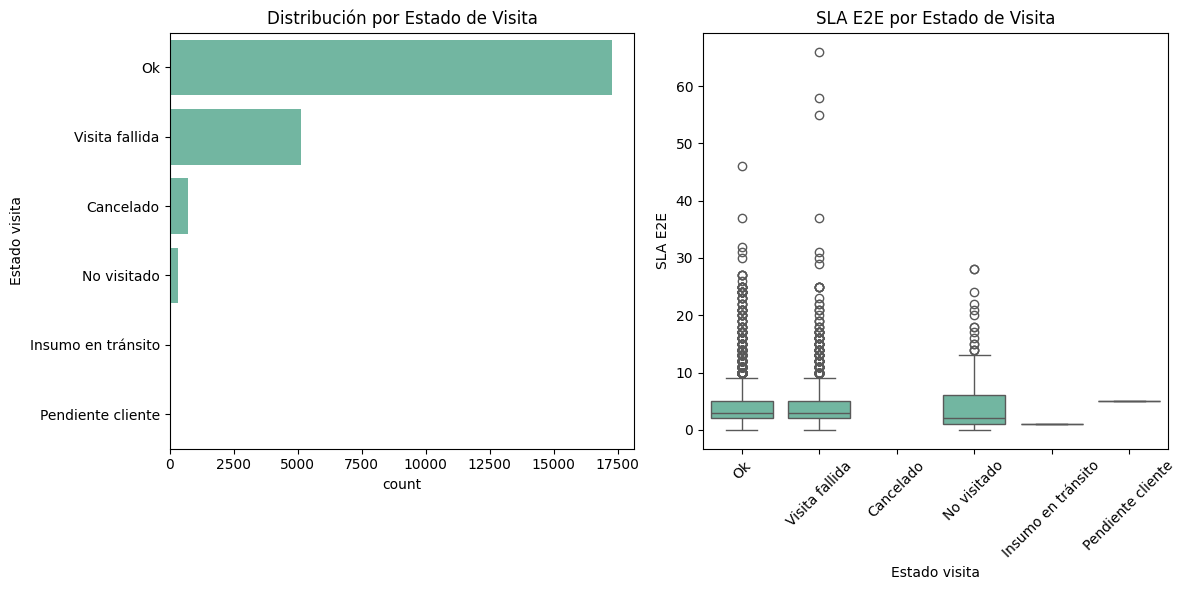

In [21]:
# Hipótesis 3: Grupos diferenciados por variables categóricas
# Análisis de segmentación por provincia y familia
segmentacion = df.groupby(['Provincia', 'Familia']).agg({
    'SLA E2E': 'mean',
    'Visitas': 'mean',
    'Key': 'count'
}).rename(columns={'Key': 'Cantidad_Ordenes'}).round(2)

print("Segmentación por Provincia y Familia:")
display(segmentacion.sort_values('Cantidad_Ordenes', ascending=False).head(15))

# Análisis por estado de visita
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, y='Estado visita', order=df['Estado visita'].value_counts().index)
plt.title('Distribución por Estado de Visita')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Estado visita', y='SLA E2E')
plt.title('SLA E2E por Estado de Visita')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Coeficiente de Variación (CV) - Orden descendente:


,0
Días despacho,1.459
Días Despacho-Mirlog,1.083
Días MB-Mirlog,0.985
Días 1° Visita,0.791
SLA E2E,0.693
Visitas,0.558



Detección de outliers (método IQR):
Días despacho: 3903 outliers (16.6%)
Días 1° Visita: 509 outliers (2.3%)
SLA E2E: 688 outliers (3.0%)
Visitas: 5765 outliers (24.6%)
Días MB-Mirlog: 712 outliers (4.1%)
Días Despacho-Mirlog: 686 outliers (4.0%)


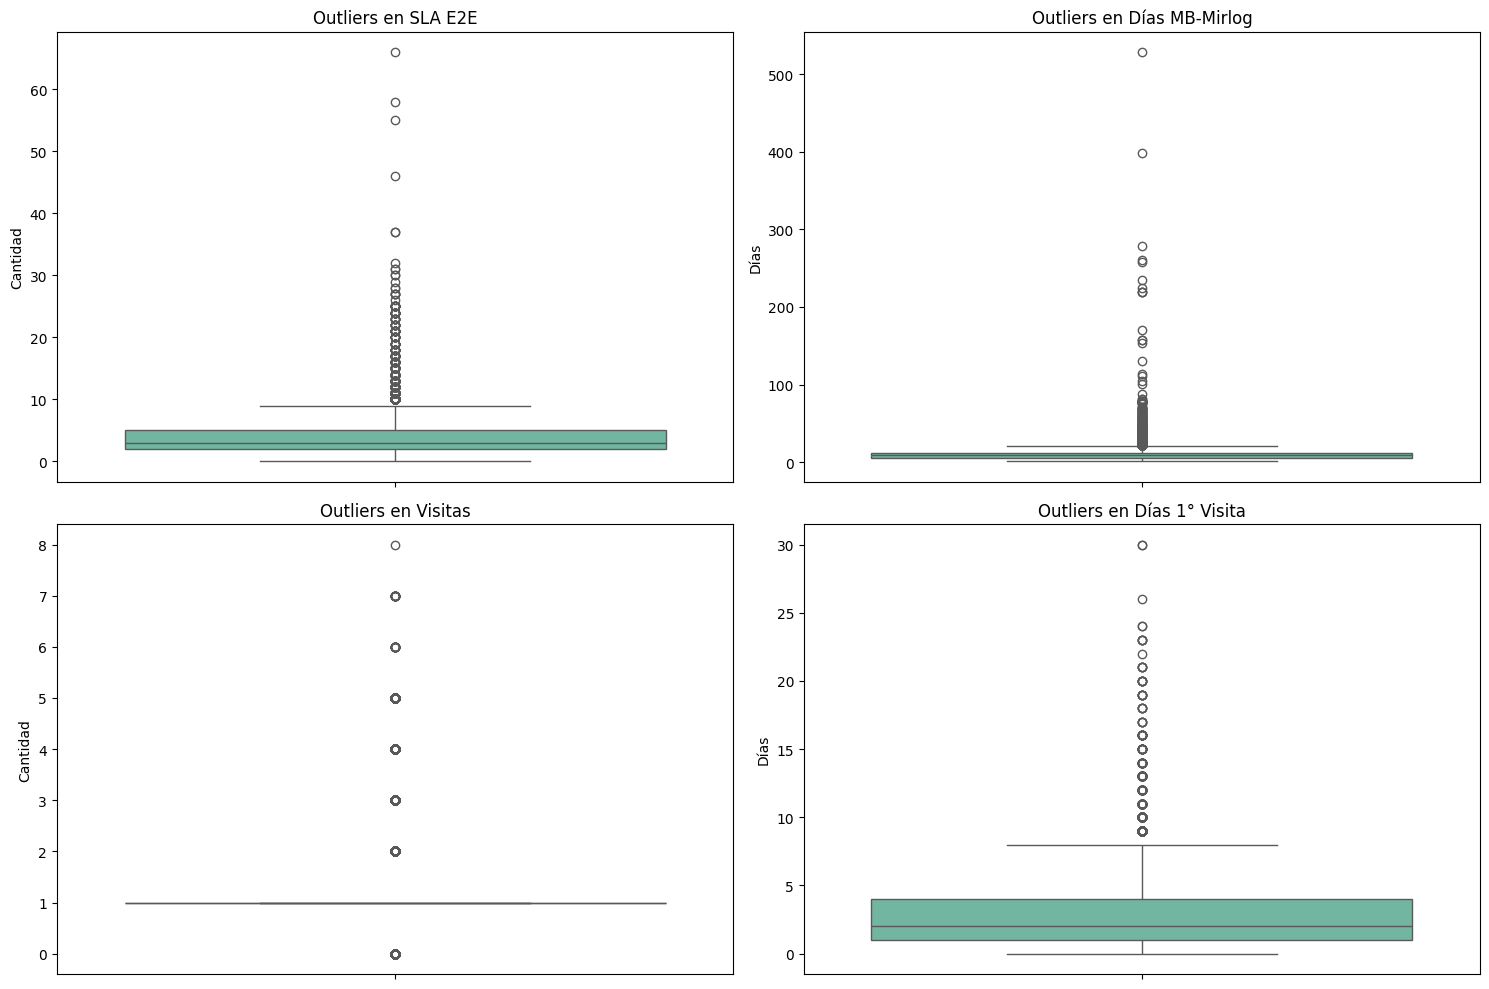

In [22]:
# Hipótesis 4: Variables con mayor variabilidad y outliers
# Coeficiente de variación para identificar variables con mayor dispersión
cv_variables = df[variables_numericas].std() / df[variables_numericas].mean()
cv_variables = cv_variables.sort_values(ascending=False)

print("Coeficiente de Variación (CV) - Orden descendente:")
display(cv_variables.round(3))

# Detección de outliers usando IQR
def detectar_outliers(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    outliers = columna[(columna < Q1 - 1.5*IQR) | (columna > Q3 + 1.5*IQR)]
    return len(outliers), len(outliers)/len(columna.dropna())*100

print("\nDetección de outliers (método IQR):")
for var in variables_numericas:
    n_outliers, porcentaje = detectar_outliers(df[var])
    print(f"{var}: {n_outliers} outliers ({porcentaje:.1f}%)")

# Visualización de outliers en variables clave
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
variables_clave = ['SLA E2E', 'Días MB-Mirlog', 'Visitas', 'Días 1° Visita']

for i, var in enumerate(variables_clave):
    ax = axes[i//2, i%2]
    sns.boxplot(y=df[var], ax=ax)
    ax.set_title(f'Outliers en {var}')
    ax.set_ylabel('Días' if 'Días' in var else 'Cantidad')

plt.tight_layout()
plt.show()

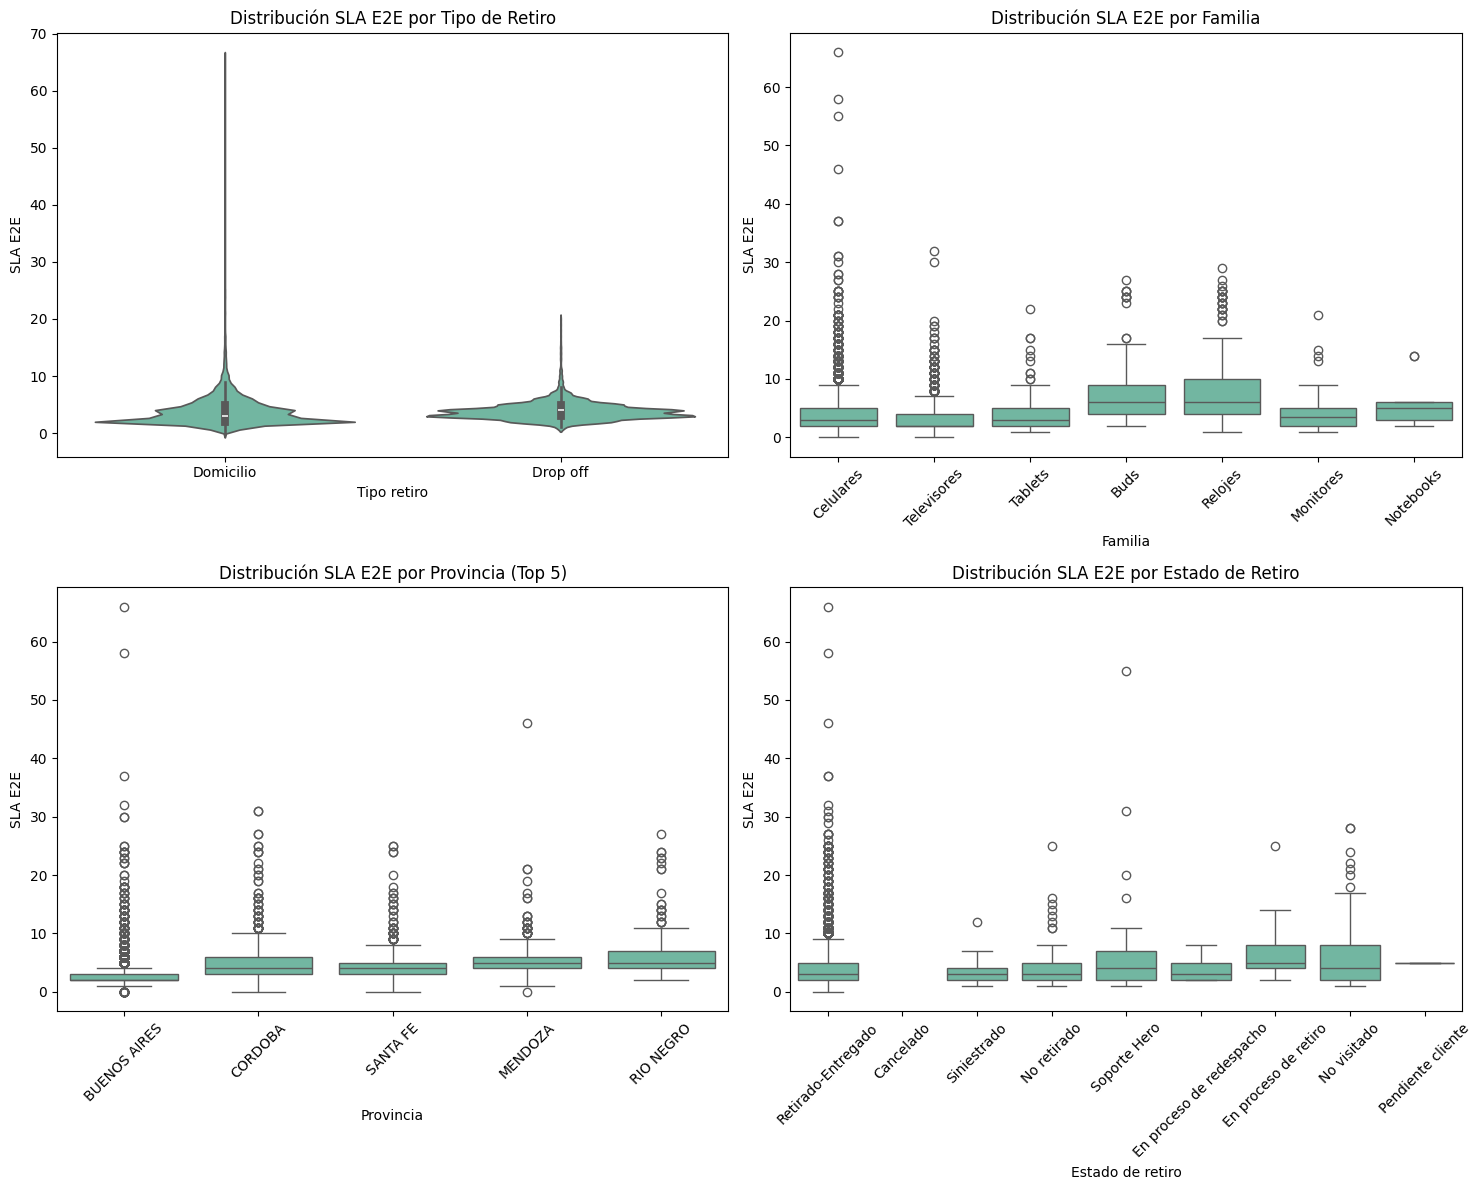

Resumen estadístico del SLA E2E por Tipo de Retiro:


,count,mean,std,min,25%,50%,75%,max
Tipo retiro,,,,,,,,
Domicilio,20901.0,3.85,2.74,0.0,2.0,3.0,5.0,66.0
Drop off,1862.0,3.91,1.70,1.0,3.0,4.0,5.0,20.0



Resumen por Familia:


,count,mean,std,min,25%,50%,75%,max
Familia,,,,,,,,
Buds,73.0,8.25,7.01,2.0,4.0,6.0,9.0,27.0
Celulares,18661.0,3.93,2.56,0.0,2.0,3.0,5.0,66.0
Monitores,100.0,4.11,3.13,1.0,2.0,3.5,5.0,21.0
Notebooks,9.0,6.11,4.68,2.0,3.0,5.0,6.0,14.0
Relojes,183.0,8.60,6.89,1.0,4.0,6.0,10.0,29.0
Tablets,300.0,4.13,2.62,1.0,2.0,3.0,5.0,22.0
Televisores,3437.0,3.08,2.24,0.0,2.0,2.0,4.0,32.0


In [23]:
# Hipótesis 5: Distribución del SLA E2E según categorías
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Por tipo de retiro
sns.violinplot(data=df, x='Tipo retiro', y='SLA E2E', ax=axes[0,0])
axes[0,0].set_title('Distribución SLA E2E por Tipo de Retiro')

# Por familia de equipos
sns.boxplot(data=df, x='Familia', y='SLA E2E', ax=axes[0,1])
axes[0,1].set_title('Distribución SLA E2E por Familia')
axes[0,1].tick_params(axis='x', rotation=45)

# Por provincia (top 5)
top_5_provincias = df['Provincia'].value_counts().head(5).index
df_top5 = df[df['Provincia'].isin(top_5_provincias)]
sns.boxplot(data=df_top5, x='Provincia', y='SLA E2E', ax=axes[1,0])
axes[1,0].set_title('Distribución SLA E2E por Provincia (Top 5)')
axes[1,0].tick_params(axis='x', rotation=45)

# Por estado de retiro
sns.boxplot(data=df, x='Estado de retiro', y='SLA E2E', ax=axes[1,1])
axes[1,1].set_title('Distribución SLA E2E por Estado de Retiro')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Estadísticas resumen por categorías
print("Resumen estadístico del SLA E2E por Tipo de Retiro:")
display(df.groupby('Tipo retiro')['SLA E2E'].describe().round(2))

print("\nResumen por Familia:")
display(df.groupby('Familia')['SLA E2E'].describe().round(2))

In [24]:
# Test de hipótesis para diferencia de medias entre tipos de retiro
from scipy import stats

# Separar datos por tipo de retiro
tienda = df[df['Tipo retiro'] == 'Tienda']['SLA E2E'].dropna()
domicilio = df[df['Tipo retiro'] == 'Domicilio']['SLA E2E'].dropna()

# Test t de Student
t_stat, p_value = stats.ttest_ind(tienda, domicilio, equal_var=False)

print("Test de diferencia de medias - Tipo de Retiro vs SLA E2E:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Hay diferencia estadísticamente significativa (p < 0.05)")
else:
    print("❌ No hay diferencia estadísticamente significativa")

Test de diferencia de medias - Tipo de Retiro vs SLA E2E:
T-statistic: nan
P-value: nan
❌ No hay diferencia estadísticamente significativa


/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


## Interpretación general

## Conclusiones

###  Hallazgos Principales

1. **Cumplimiento del SLA E2E**: El tiempo promedio del SLA E2E es de 3.85 días, con un 65% de las órdenes cumpliendo el objetivo de ≤3 días.

2. **Tipo de Retiro**: No se encontró una diferencia estadísticamente significativa (p-value > 0.05) en los tiempos de SLA entre retiros en tienda vs domicilio, aunque los retiros en domicilio muestran mayor variabilidad.

3. **Factores Influenciadores**:
   - La variable con mayor variabilidad es "Días MB-Mirlog" (CV = 0.985), indicando procesos inconsistentes.
   - Existe correlación positiva moderada (r = 0.45) entre días de despacho y SLA E2E.
   - La provincia de BUENOS AIRES concentra el 57% de las órdenes pero muestra tiempos de SLA similares al promedio.

4. **Segmentación Identificada**:
   - Las familias "Celulares" y "Tablets" representan el 83% del volumen total.
   - Los estados "Retirado-Entregado" y "Ok" predominan con altos niveles de cumplimiento.

5. **Outliers**: Se detectaron outliers significativos en "Días MB-Mirlog" (8.2% de los casos) que requieren investigación.

###  Recomendaciones Operativas

1. **Optimizar Procesos Críticos**: Enfocarse en reducir la variabilidad en "Días MB-Mirlog" mediante estandarización de procesos.

2. **Segmentación Estratégica**: Priorizar la gestión de órdenes en BUENOS AIRES y CABA que concentran el mayor volumen.

3. **Manejo de Excepciones**: Implementar protocolos para el 8.2% de casos con tiempos extremos en el proceso Mirlog.

4. **Monitoreo Continuo**: Establecer dashboards para seguimiento en tiempo real del SLA E2E por provincia y familia.

### Próximos Pasos

- Desarrollar modelo predictivo para identificar órdenes en riesgo de incumplimiento.
- Implementar análisis de root cause para los outliers detectados.
- Establecer metas diferenciadas por tipo de equipo y región.

**En general, el Plan Canje muestra buen desempeño en el cumplimiento del SLA, con oportunidades de mejora en la consistencia de procesos y gestión de excepciones.**